In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy

In [3]:
pubs_author_funder = pd.read_csv("..//..//data//dropbox//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else 'Not-Funded')
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [4]:
author_df=pubs_author_funder[['author_country','funder_country','year']]
author_df['author_country']=author_df['author_country'].apply(lambda x:list(set(x)))
author_df['funded']=author_df['funder_country'].apply(
    lambda x: 1 if x!='Not-Funded' else 0)
author_df

<ipython-input-4-d53e2b21ecb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_df['author_country']=author_df['author_country'].apply(lambda x:list(set(x)))
<ipython-input-4-d53e2b21ecb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_df['funded']=author_df['funder_country'].apply(


,author_country,funder_country,year,funded
0,[Turkey],[Turkey],2009,1
1,"[United States, France]","[United States, United States, United States, ...",2009,1
2,[Russia],[Russia],2009,1
3,[Spain],"[Spain, Spain, Spain, Spain, Spain, Spain]",2009,1
4,"[Germany, Spain]",[Spain],2009,1
...,...,...,...,...
12759123,[Pakistan],Not-Funded,2018,0
12759124,[Singapore],Not-Funded,2017,0
12759125,[Iran],Not-Funded,2017,0
12759126,[Israel],Not-Funded,2017,0


In [6]:
author_df = author_df.explode('author_country')
author_df.head()

,author_country,funder_country,year,funded
0,Turkey,[Turkey],2009,1
1,United States,"[United States, United States, United States, ...",2009,1
1,France,"[United States, United States, United States, ...",2009,1
2,Russia,[Russia],2009,1
3,Spain,"[Spain, Spain, Spain, Spain, Spain, Spain]",2009,1


In [7]:
cntry_ratio=author_df.groupby(['author_country','funded','year']).size().reset_index(name='count')
cntry_ratio=cntry_ratio.replace({'funded':{0:'not-funded',1:'funded'}})
cntry_ratio=cntry_ratio.pivot_table(index=['author_country','year'],columns='funded',values='count')
cntry_ratio['sum']=cntry_ratio.sum(axis=1)
cntry_ratio.head()

funded               funded  not-funded   sum
author_country year                          
Afghanistan    2009     7.0        10.0  17.0
               2010    13.0        20.0  33.0
               2011    11.0        17.0  28.0
               2012    10.0        29.0  39.0
               2013    16.0        11.0  27.0

In [8]:
cntry_ratio[['funded-ratio','notfund-ratio']] = cntry_ratio[['funded','not-funded']].div(cntry_ratio['sum'],axis=0)
cntry_ratio.head()

funded               funded  not-funded   sum  funded-ratio  notfund-ratio
author_country year                                                       
Afghanistan    2009     7.0        10.0  17.0      0.411765       0.588235
               2010    13.0        20.0  33.0      0.393939       0.606061
               2011    11.0        17.0  28.0      0.392857       0.607143
               2012    10.0        29.0  39.0      0.256410       0.743590
               2013    16.0        11.0  27.0      0.592593       0.407407

In [9]:
cntry_ratio_filter = cntry_ratio[cntry_ratio['sum']>1000]
cntry_ratio_filter=cntry_ratio_filter.reset_index()
cntry_ratio_filter.head()

funded,author_country,year,funded,not-funded,sum,funded-ratio,notfund-ratio
0,Algeria,2009,255.0,1331.0,1586.0,0.160782,0.839218
1,Algeria,2010,320.0,1328.0,1648.0,0.194175,0.805825
2,Algeria,2011,363.0,1388.0,1751.0,0.207310,0.792690
3,Algeria,2012,418.0,1543.0,1961.0,0.213157,0.786843
4,Algeria,2013,522.0,1688.0,2210.0,0.236199,0.763801


In [40]:
cntry_ratio_filter[cntry_ratio_filter.year==2018].sort_values(by='funded-ratio',ascending=False).head(20)

funded,author_country,year,funded,not-funded,sum,funded-ratio,notfund-ratio
116,China,2018,330956.0,56325.0,387281.0,0.854563,0.145437
182,Estonia,2018,1545.0,263.0,1808.0,0.854535,0.145465
149,Czech Republic,2018,10506.0,2552.0,13058.0,0.804564,0.195436
514,Slovakia,2018,2777.0,801.0,3578.0,0.776132,0.223868
195,Finland,2018,9090.0,2716.0,11806.0,0.769947,0.230053
564,Sweden,2018,19617.0,6007.0,25624.0,0.765571,0.234429
584,Taiwan,2018,17119.0,5387.0,22506.0,0.760642,0.239358
449,Portugal,2018,10374.0,3354.0,13728.0,0.755682,0.244318
544,South Korea,2018,43713.0,14743.0,58456.0,0.747793,0.252207
19,Argentina,2018,6815.0,2539.0,9354.0,0.728565,0.271435


In [11]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bc56880d0>,
      dtype=object)

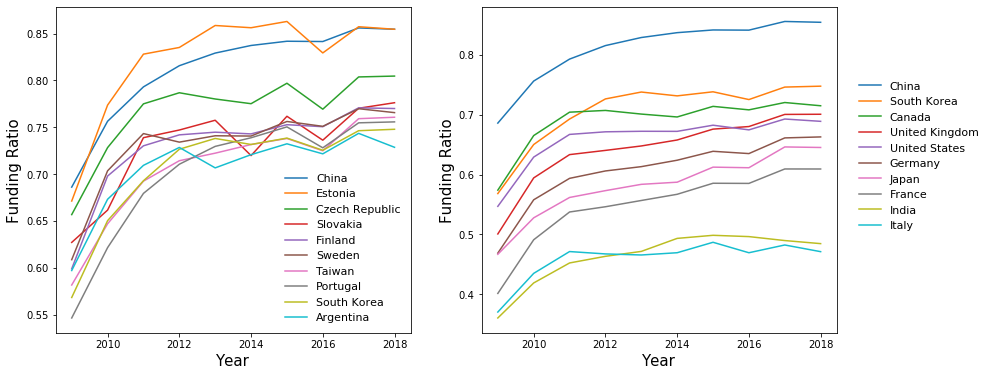

In [23]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
n=10
xticks=np.arange(2009,2019,2)
topn = cntry_ratio_filter[cntry_ratio_filter.year==2018].sort_values(by='funded-ratio',ascending=False).head(n)['author_country'].tolist()
sns.lineplot(data = cntry_ratio_filter[cntry_ratio_filter.author_country.isin(topn)],x='year',y='funded-ratio',hue='author_country',
             hue_order=topn,legend=True, ax=axes[0])
axes[0].legend(loc='lower right',frameon=False,fontsize=11)
axes[0].set_ylabel("Funding Ratio",fontsize=15)
axes[0].set_xlabel('Year',fontsize=15)

topn = cntry_ratio_filter[cntry_ratio_filter.year==2018].sort_values(by='sum',ascending=False).head(n)
topn = topn.sort_values(by='funded-ratio',ascending=False)['author_country'].tolist()
sns.lineplot(data = cntry_ratio_filter[cntry_ratio_filter.author_country.isin(topn)],x='year',y='funded-ratio',hue='author_country',
             hue_order=topn,legend=True, ax=axes[1])
axes[1].legend(loc=[1.05,0.3],frameon=False,fontsize=11)
axes[1].set_xlabel('Year',fontsize=15)
axes[1].set_ylabel("Funding Ratio",fontsize=15)
plt.savefig("funding_ratio_top10.pdf",bbox_inches="tight")